In [1]:
import xml.etree.ElementTree as et
from affiliation_parser import parse_affil
import pandas as pd
from matplotlib.pyplot import savefig
from matplotlib import rcParams

use trained model from /home/fernando/affiliation_parser_data


In [2]:
tree = et.parse("sp_nov_2001_2018_pubmed_16012019_ed.xml")
root = tree.getroot()

In [3]:
#Journals
with open("tabela_countries.txt", "w") as file:
    file.write("Journal" + "\t" + "Article Title" + "\t" + "Year" + "\t" + "Affiliation" + "\t" + "Country" + "\n")
    for article_set in root.findall("PubmedArticleSet"):
        for pubmed_article in article_set.findall("PubmedArticle"):
            for medline_citation in pubmed_article.findall("MedlineCitation"):
                for article in medline_citation.findall("Article"):
                    title = article.find("ArticleTitle").text
                    for author_list in article.findall("AuthorList"):
                        first_author = author_list[0]
                        aff_info = first_author.find("AffiliationInfo")
                        try:
                            affiliation = aff_info.find("Affiliation").text
                            country_fa = parse_affil(affiliation)["country"]
                        except:
                            country_fa = ""
                    for journal in article.findall("Journal"):
                        journal_title = journal.find("Title").text
                        for journal_issue in journal.findall("JournalIssue"):
                            for pubdate in journal_issue.findall("PubDate"):
                                try:
                                    year = pubdate.find("Year").text
                                    pass
                                except:
                                    year = pubdate.find("MedlineDate").text.split(" ")[0]
                                file.write(journal_title + "\t" + title + "\t" + year + "\t" + affiliation + "\t" + country_fa + "\n")


              

In [4]:
df = pd.read_csv("tabela_countries.txt", sep="\t")

In [5]:
falta_country = df[df["Country"].isna()]
falta_country.to_csv("falta_country.csv")

In [6]:
sem_2019 = df[df["Year"] != 2019]

In [7]:
df[df["Year"] == 2019]

,Journal,Article Title,Year,Affiliation,Country
0,"Journal of microbiology (Seoul, Korea)","Mediterraneibacter butyricigenes sp. nov., a b...",2019,"Korean Collection for Type Cultures, Biologica...",south korea
3,"Journal of microbiology (Seoul, Korea)","Gramella fulva sp. nov., isolated from a dry s...",2019,"Department of Biology, College of Natural Scie...",south korea
4,"Journal of microbiology (Seoul, Korea)","Flavisolibacter aluminii sp. nov., a novel mem...",2019,Department of Agricultural Biotechnology and R...,south korea


In [8]:
sem_2019.to_csv("tabela_countries_s_2019.csv")

In [9]:
sem_2019

,Journal,Article Title,Year,Affiliation,Country
1,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",2018,"2​Freshwater Bioresources Research Bureau, Nak...",south korea
2,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",2018,"1​State Key Laboratory of Microbial Resources,...",china
5,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,2018,"1​Institute of Biochemistry and Biophysics, Po...",poland
6,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",2018,1​Microbe Division/Japan Collection of Microor...,japan
7,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",2018,"1​Center of Infectious Diseases, West China Ho...",china
8,International journal of systematic and evolut...,"Enterobacter sichuanensis sp. nov., recovered ...",2018,"1​Center of Infectious Diseases, West China Ho...",china
9,International journal of systematic and evolut...,"Kribbella monticola sp. nov., a novel actinomy...",2018,1​Key Laboratory of Agriculture Biological Fun...,china
10,International journal of systematic and evolut...,"Halomonas litopenaei sp. nov., a moderately ha...",2018,"1​Fisheries College, Guangdong Ocean Universit...",china
11,International journal of systematic and evolut...,"Alsobacter soli sp. nov., a novel bacterium is...",2018,1​Eco-Environmental Protection Research Instit...,china
12,International journal of systematic and evolut...,"Microbacterium halophytorum sp. nov., a novel ...",2018,1​Xinjiang Key Laboratory of Special Species C...,china


# Tabela curada manualmente

In [10]:
manual = pd.read_csv("df_manual.csv", index_col=[0])

In [11]:
manual.head(5)

,Journal,Article Title,Year,Affiliation,Country
57,International journal of systematic and evolut...,"Pectobacterium punjabense sp. nov., isolated f...",2018,"1​Department of Plant Pathology, Faculty of Ag...",pakistan
198,"Journal of microbiology (Seoul, Korea)",Taxonomic description and draft genome of Pseu...,2018,"Wetland Research and Training Centre, Chilika ...",india
308,Systematic and applied microbiology,"Bradyrhizobium algeriense sp. nov., a novel sp...",2018,"Laboratoire d'Ecologie Microbienne, Faculté de...",algeria
466,International journal of systematic and evolut...,Listeria costaricensis sp. nov.,2018,"1​Centro de Investigación en Biotecnología, Es...",costa rica
544,International journal of systematic and evolut...,"Leptospira venezuelensis sp. nov., a new membe...",2018,"1​Unidad de Estudios Genéticos y Forenses, Ins...",venezuela


In [12]:
sem_2019_sem_na = sem_2019.dropna(how="any")

In [13]:
completa = sem_2019_sem_na.append(manual)

In [14]:
completa

,Journal,Article Title,Year,Affiliation,Country
1,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",2018,"2​Freshwater Bioresources Research Bureau, Nak...",south korea
2,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",2018,"1​State Key Laboratory of Microbial Resources,...",china
5,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,2018,"1​Institute of Biochemistry and Biophysics, Po...",poland
6,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",2018,1​Microbe Division/Japan Collection of Microor...,japan
7,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",2018,"1​Center of Infectious Diseases, West China Ho...",china
8,International journal of systematic and evolut...,"Enterobacter sichuanensis sp. nov., recovered ...",2018,"1​Center of Infectious Diseases, West China Ho...",china
9,International journal of systematic and evolut...,"Kribbella monticola sp. nov., a novel actinomy...",2018,1​Key Laboratory of Agriculture Biological Fun...,china
10,International journal of systematic and evolut...,"Halomonas litopenaei sp. nov., a moderately ha...",2018,"1​Fisheries College, Guangdong Ocean Universit...",china
11,International journal of systematic and evolut...,"Alsobacter soli sp. nov., a novel bacterium is...",2018,1​Eco-Environmental Protection Research Instit...,china
12,International journal of systematic and evolut...,"Microbacterium halophytorum sp. nov., a novel ...",2018,1​Xinjiang Key Laboratory of Special Species C...,china


In [15]:
completa[completa["Country"].isna()]

,Journal,Article Title,Year,Affiliation,Country


In [16]:
completa.to_csv("tabela_paises.csv")

In [17]:
completa["Article Title"].to_csv("titles_completa_countries.txt")

# Gráficos

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
completa["Country"].value_counts()

china                       2322
south korea                 2133
japan                        830
germany                      595
united states of america     456
india                        444
spain                        352
russia                       314
france                       271
taiwan                       244
united kingdom               216
thailand                     171
belgium                      160
australia                     88
portugal                      84
austria                       76
italy                         65
brazil                        62
czech republic                58
denmark                       57
netherlands                   55
iran                          52
canada                        51
turkey                        50
south africa                  44
mexico                        35
hungary                       34
switzerland                   33
algeria                       33
greece                        32
          

In [20]:
#Todos
all_papers_by_year = pd.DataFrame(completa["Year"].value_counts().reset_index())
all_papers_by_year.columns = ['year', 'count']
all_papers_by_year_sorted = all_papers_by_year.sort_values(by="year").reset_index(drop=True)
all_papers_by_year_sorted['cum_sum'] = all_papers_by_year_sorted["count"].cumsum()
all_papers_by_year_sorted

,year,count,cum_sum
0,2001,179,179
1,2002,234,413
2,2003,269,682
3,2004,330,1012
4,2005,376,1388
5,2006,416,1804
6,2007,502,2306
7,2008,486,2792
8,2009,529,3321
9,2010,534,3855


In [21]:
#china
china = completa[completa["Country"] == "china"]
china_papers_by_year = pd.DataFrame(china["Year"].value_counts().reset_index())
china_papers_by_year.columns = ['year', 'count']
china_papers_by_year_sorted = china_papers_by_year.sort_values(by="year").reset_index(drop=True)
china_papers_by_year_sorted['cum_sum'] = china_papers_by_year_sorted["count"].cumsum()
china_papers_by_year_sorted["proportion"] = china_papers_by_year_sorted["count"]/all_papers_by_year_sorted["count"]
china_papers_by_year_sorted

,year,count,cum_sum,proportion
0,2001,6,6,0.033520
1,2002,14,20,0.059829
2,2003,14,34,0.052045
3,2004,22,56,0.066667
4,2005,41,97,0.109043
5,2006,33,130,0.079327
6,2007,50,180,0.099602
7,2008,78,258,0.160494
8,2009,134,392,0.253308
9,2010,95,487,0.177903


In [22]:
#korea
korea = completa[completa["Country"] == "south korea"]
korea_papers_by_year = pd.DataFrame(korea["Year"].value_counts().reset_index())
korea_papers_by_year.columns = ['year', 'count']
korea_papers_by_year_sorted = korea_papers_by_year.sort_values(by="year").reset_index(drop=True)
korea_papers_by_year_sorted['cum_sum'] = korea_papers_by_year_sorted["count"].cumsum()
korea_papers_by_year_sorted["proportion"] = korea_papers_by_year_sorted["count"]/all_papers_by_year_sorted["count"]
korea_papers_by_year_sorted

,year,count,cum_sum,proportion
0,2001,9,9,0.050279
1,2002,12,21,0.051282
2,2003,19,40,0.070632
3,2004,35,75,0.106061
4,2005,61,136,0.162234
5,2006,96,232,0.230769
6,2007,140,372,0.278884
7,2008,127,499,0.261317
8,2009,105,604,0.198488
9,2010,121,725,0.226592


In [23]:
japan = completa[completa["Country"] == "japan"]
japan_papers_by_year = pd.DataFrame(japan["Year"].value_counts().reset_index())
japan_papers_by_year.columns = ['year', 'count']
japan_papers_by_year_sorted = japan_papers_by_year.sort_values(by="year").reset_index(drop=True)
japan_papers_by_year_sorted['cum_sum'] = japan_papers_by_year_sorted["count"].cumsum()
japan_papers_by_year_sorted["proportion"] = japan_papers_by_year_sorted["count"]/all_papers_by_year_sorted["count"]
japan_papers_by_year_sorted

,year,count,cum_sum,proportion
0,2001,16,16,0.089385
1,2002,28,44,0.119658
2,2003,31,75,0.115242
3,2004,40,115,0.121212
4,2005,42,157,0.111702
5,2006,47,204,0.112981
6,2007,83,287,0.165339
7,2008,57,344,0.117284
8,2009,55,399,0.103970
9,2010,55,454,0.102996


In [24]:
germany = completa[completa["Country"] == "germany"]
germany_papers_by_year = pd.DataFrame(germany["Year"].value_counts().reset_index())
germany_papers_by_year.columns = ['year', 'count']
germany_papers_by_year_sorted = germany_papers_by_year.sort_values(by="year").reset_index(drop=True)
germany_papers_by_year_sorted['cum_sum'] = germany_papers_by_year_sorted["count"].cumsum()
germany_papers_by_year_sorted["proportion"] = germany_papers_by_year_sorted["count"]/all_papers_by_year_sorted["count"]
germany_papers_by_year_sorted

,year,count,cum_sum,proportion
0,2001,25,25,0.139665
1,2002,33,58,0.141026
2,2003,26,84,0.096654
3,2004,27,111,0.081818
4,2005,21,132,0.055851
5,2006,37,169,0.088942
6,2007,35,204,0.069721
7,2008,30,234,0.061728
8,2009,33,267,0.062382
9,2010,39,306,0.073034


In [25]:
#usa
usa = completa[completa["Country"] == "united states of america"]
usa_papers_by_year = pd.DataFrame(usa["Year"].value_counts().reset_index())
usa_papers_by_year.columns = ['year', 'count']
usa_papers_by_year_sorted = usa_papers_by_year.sort_values(by="year").reset_index(drop=True)
usa_papers_by_year_sorted['cum_sum'] = usa_papers_by_year_sorted["count"].cumsum()
usa_papers_by_year_sorted["proportion"] = usa_papers_by_year_sorted["count"]/all_papers_by_year_sorted["count"]
usa_papers_by_year_sorted

,year,count,cum_sum,proportion
0,2001,21,21,0.117318
1,2002,20,41,0.085470
2,2003,26,67,0.096654
3,2004,34,101,0.103030
4,2005,27,128,0.071809
5,2006,36,164,0.086538
6,2007,30,194,0.059761
7,2008,19,213,0.039095
8,2009,22,235,0.041588
9,2010,22,257,0.041199


In [26]:
#brazil
brazil = completa[completa["Country"] == "brazil"]
brazil_papers_by_year = pd.DataFrame(brazil["Year"].value_counts().reset_index())
brazil_papers_by_year.columns = ['year', 'count']
new_rows = pd.DataFrame([[2007, 0], [2008, 0], [2009, 0]], columns=["year", "count"])
brazil_papers_by_year = brazil_papers_by_year.append(new_rows)
brazil_papers_by_year_sorted = brazil_papers_by_year.sort_values(by="year").reset_index(drop=True)
brazil_papers_by_year_sorted['cum_sum'] = brazil_papers_by_year_sorted["count"].cumsum()
brazil_papers_by_year_sorted["proportion"] = brazil_papers_by_year_sorted["count"]/all_papers_by_year_sorted["count"]
brazil_papers_by_year_sorted

,year,count,cum_sum,proportion
0,2001,1,1,0.005587
1,2002,1,2,0.004274
2,2003,2,4,0.007435
3,2004,2,6,0.006061
4,2005,1,7,0.002660
5,2006,3,10,0.007212
6,2007,0,10,0.000000
7,2008,1,11,0.002058
8,2008,0,11,0.000000
9,2009,0,11,0.000000


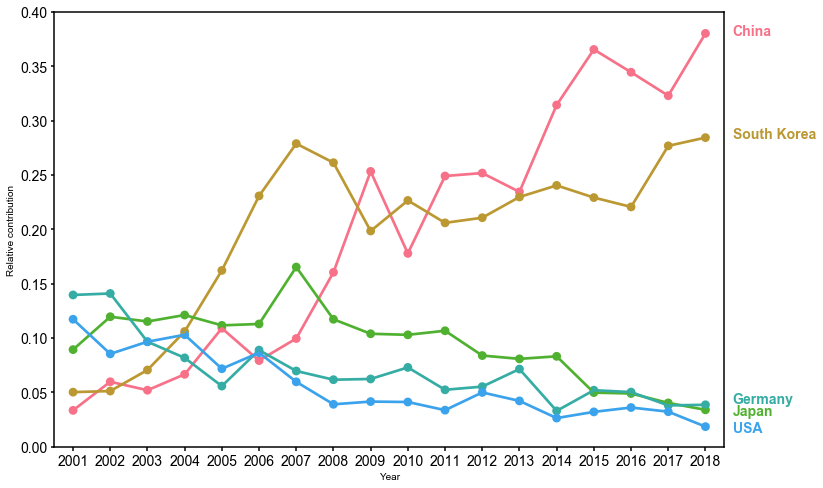

In [34]:
#Proportion of number of papers by year considering first author country affiliation

fig, ax = plt.subplots(figsize=(12,8))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

data_set = [china_papers_by_year_sorted, korea_papers_by_year_sorted, japan_papers_by_year_sorted, germany_papers_by_year_sorted, usa_papers_by_year_sorted]
country_set = ["China", "South Korea", "Japan", "Germany", "USA"]
color_set = sns.color_palette("husl")
y_set = [0.84, 0.66, 0.18, 0.20, 0.15]


for d, c, i, y_pos in zip(data_set, country_set, color_set, y_set):
    sns.pointplot(x="year", y="proportion", data = d, color = i)
    fig.text(x = 0.91, y = y_pos, s = c, weight = "bold", family='sans-serif', fontsize=14, color = i)

ax.set_ylim([0,0.4])
ax.set_ylabel("Relative contribution")
ax.set_xlabel("Year")

ax.xaxis.set_tick_params(width=1.5, labelsize=14)
ax.yaxis.set_tick_params(width=1.5, labelsize=14)
#pal = sns.color_palette("Set1")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
    
plt.show()

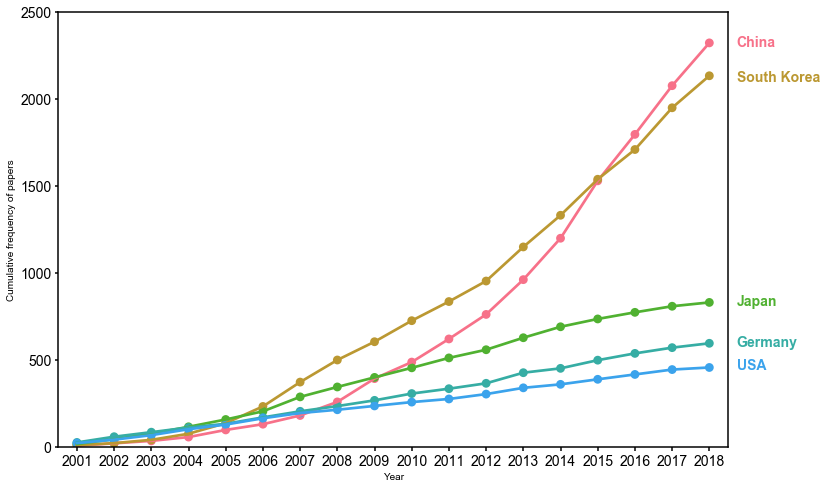

In [33]:
#Cumulative number of papers by year considering first author country affiliation

fig, ax = plt.subplots(figsize=(12,8))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

data_set = [china_papers_by_year_sorted, korea_papers_by_year_sorted, japan_papers_by_year_sorted, germany_papers_by_year_sorted, usa_papers_by_year_sorted]
country_set = ["China", "South Korea", "Japan", "Germany", "USA"]
color_set = sns.color_palette("husl")
y_set = [0.82, 0.76, 0.37, 0.30, 0.26]


for d, c, i, y_pos in zip(data_set, country_set, color_set, y_set):
    sns.pointplot(x="year", y="cum_sum", data = d, color = i)
    fig.text(x = 0.91, y = y_pos, s = c, weight = "bold", family='sans-serif', fontsize=14, color = i)


ax.set_ylim([0,2500])
ax.set_ylabel("Cumulative frequency of papers")
ax.set_xlabel("Year")

ax.xaxis.set_tick_params(width=1.5, labelsize=14)
ax.yaxis.set_tick_params(width=1.5, labelsize=14)
#pal = sns.color_palette("Set1")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
    
plt.show()